### 1. 필요한 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 2. 데이터 불러오기

In [2]:
df_kospi = pd.read_excel("..\data\KOSPI데이터0305.xlsx")

### 3. 데이터 확인

In [3]:
df_kospi.head()

,종목명,종목코드,시가총액,매출액,현금흐름,PER,ROE,ROA,PBR,PSR,PCR,자산총계,부채총계,자본총계,주당순이익
0,삼성전자,5930,4351971,2796048,651054.5,12.62,13.92,9.92,1.67,1.556472,6.684496,4266212,1217212,3049000,5777
1,SK하이닉스,660,939123,319004,123145.7,11.66,9.53,6.98,1.51,2.943922,7.626113,711739,192648,519091,11061
2,NAVER,35420,533980,53041,14472.1,3.22,15.22,5.77,2.05,10.067306,36.897202,170142,87591,82551,101024
3,카카오,35720,430799,41568,9711.0,38.03,2.70,1.68,4.76,10.363717,44.361961,119540,45262,74278,2540
4,LG화학,51910,393905,300765,58408.3,14.54,2.93,1.81,2.04,1.309677,6.743990,413889,225985,187904,38376


In [4]:
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     787 non-null    object 
 1   종목코드    787 non-null    int64  
 2   시가총액    787 non-null    int64  
 3   매출액     787 non-null    int64  
 4   현금흐름    787 non-null    float64
 5   PER     787 non-null    float64
 6   ROE     787 non-null    float64
 7   ROA     787 non-null    float64
 8   PBR     787 non-null    float64
 9   PSR     787 non-null    float64
 10  PCR     787 non-null    float64
 11  자산총계    787 non-null    int64  
 12  부채총계    787 non-null    int64  
 13  자본총계    787 non-null    int64  
 14  주당순이익   787 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 92.4+ KB


### 4. 지표간 상관관계 분석을 위해 필요없는 컬럼 제외

In [5]:
df = df_kospi.copy()

In [6]:
df.drop(columns=["종목명", "종목코드"], inplace=True)
df.head(2)

,시가총액,매출액,현금흐름,PER,ROE,ROA,PBR,PSR,PCR,자산총계,부채총계,자본총계,주당순이익
0,4351971,2796048,651054.5,12.62,13.92,9.92,1.67,1.556472,6.684496,4266212,1217212,3049000,5777
1,939123,319004,123145.7,11.66,9.53,6.98,1.51,2.943922,7.626113,711739,192648,519091,11061


### 5. scatter plot 그리기

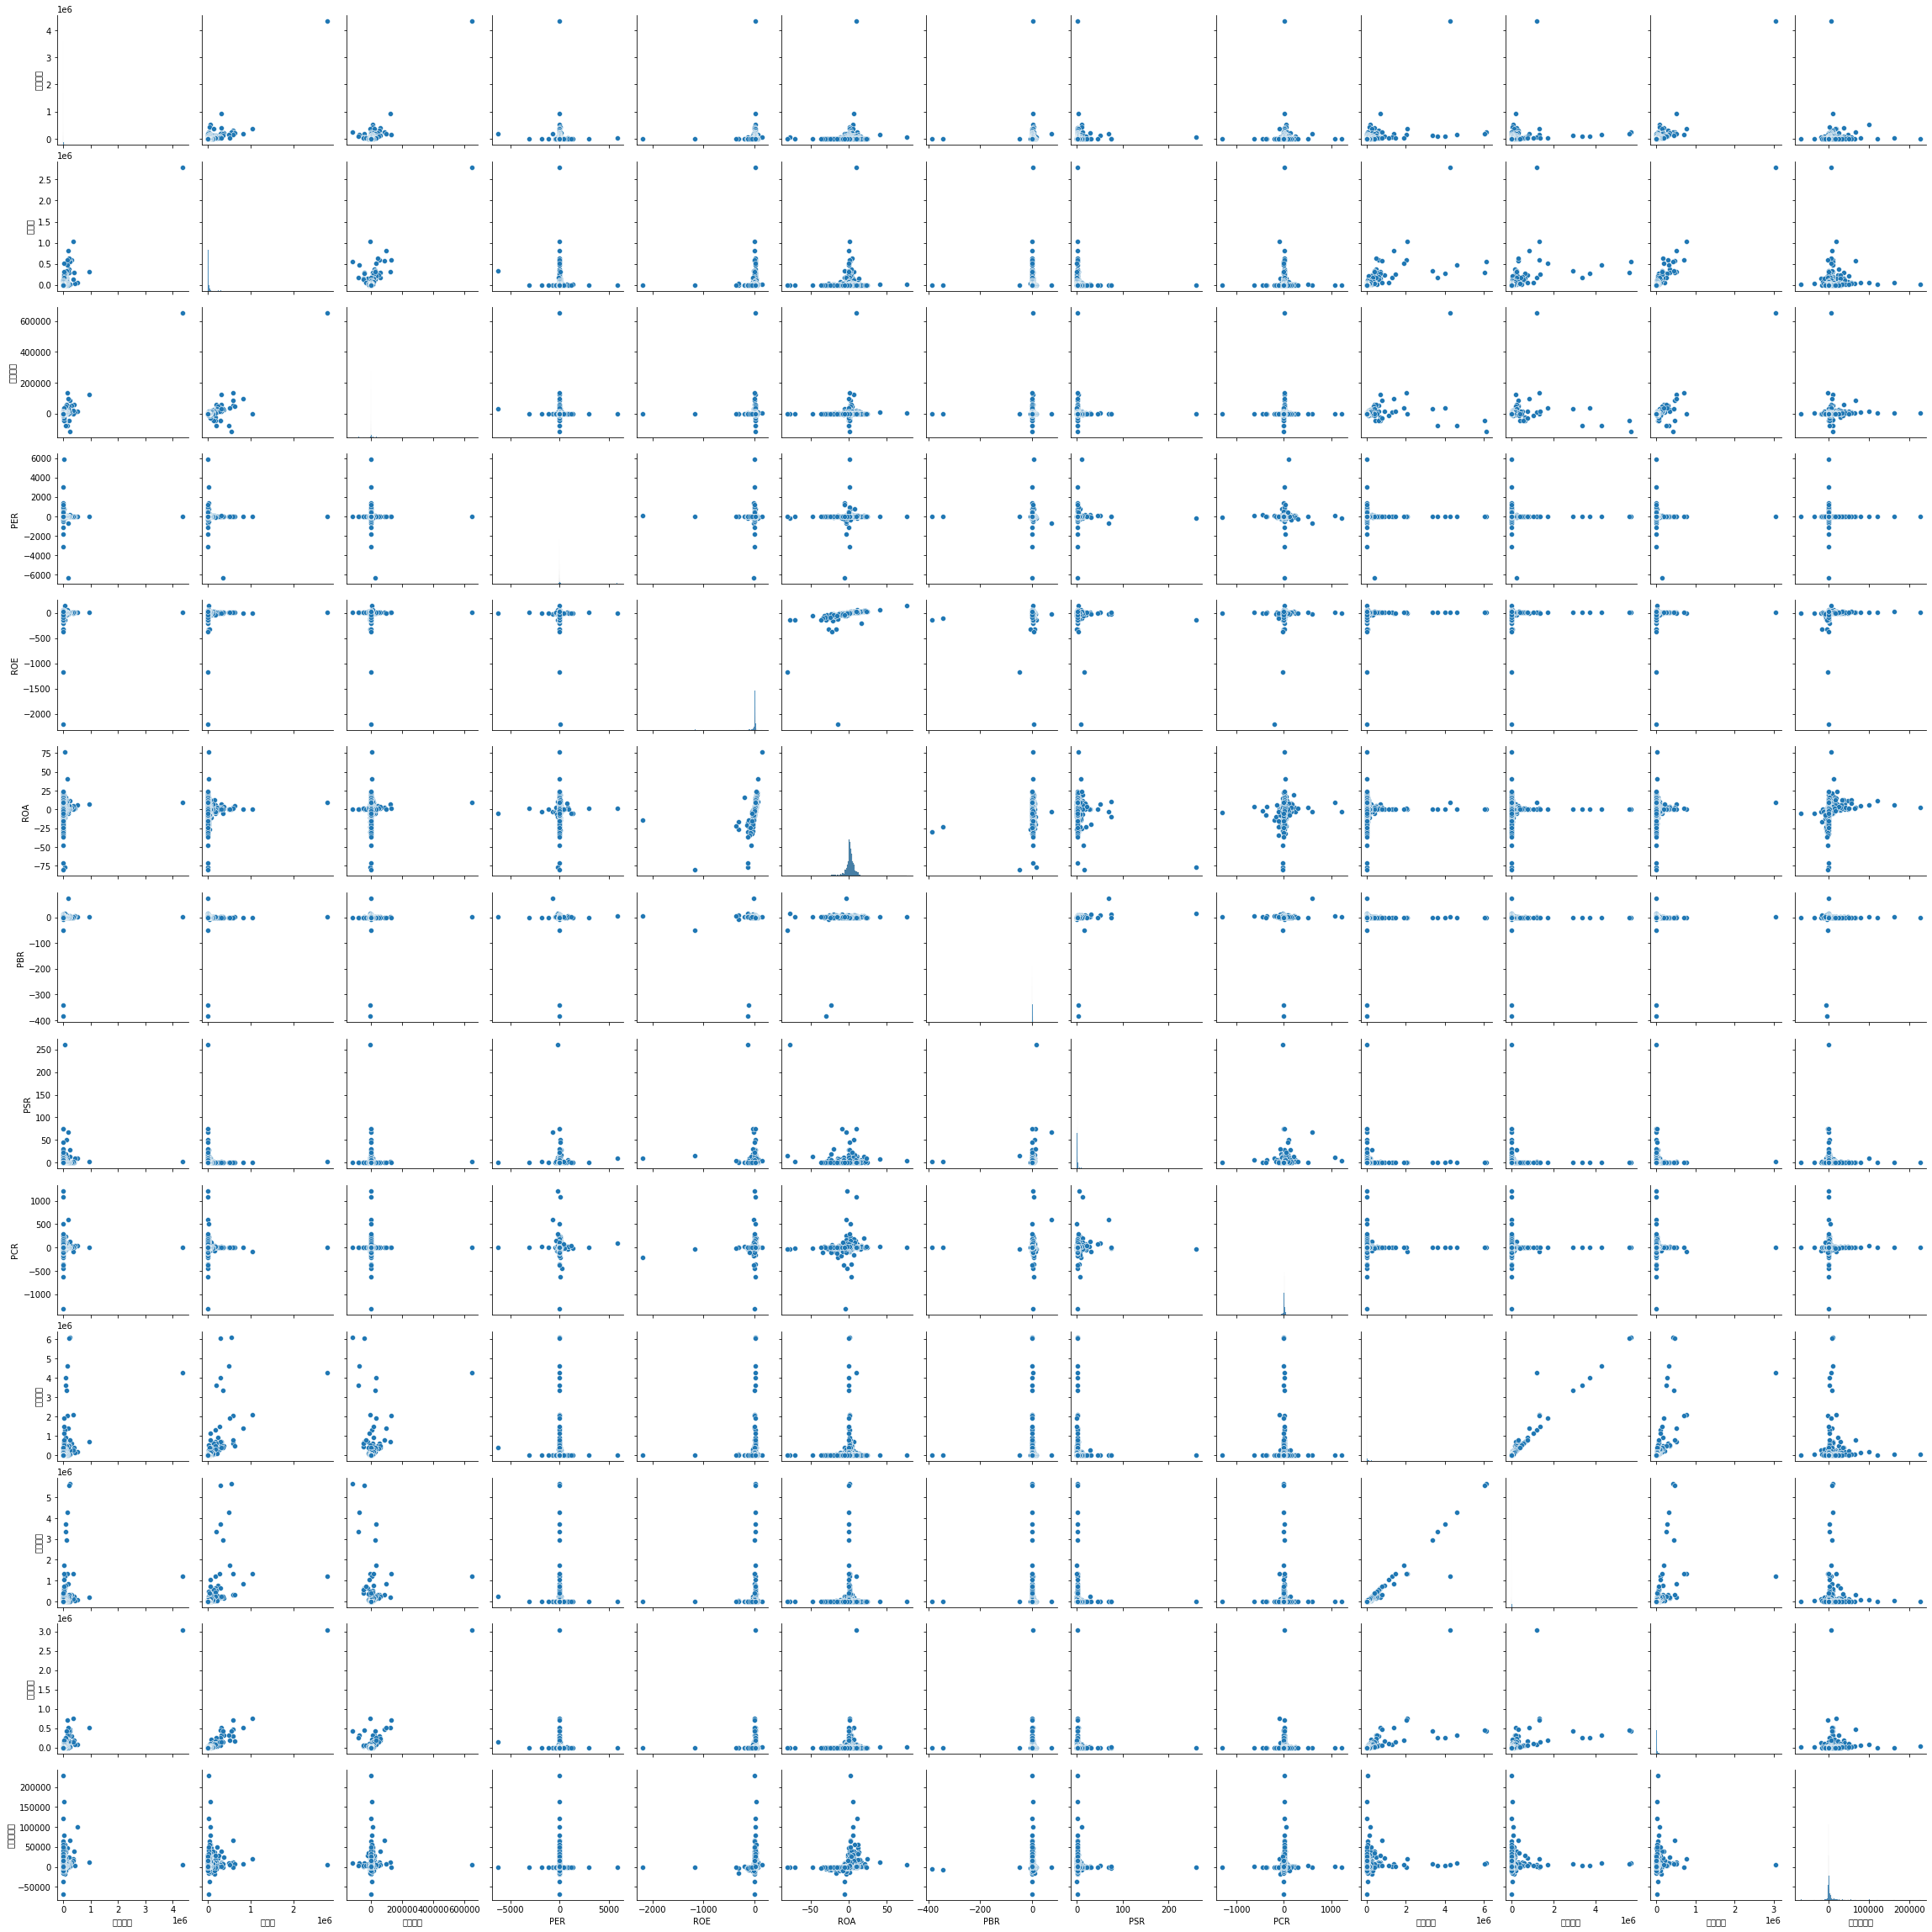

In [8]:
# 전체 변수 간의 관계 Scatter Matrix 생성
sns.pairplot(df) 

- 한글 깨짐 방지 코드

In [12]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list[:5]

['STIXSizeFourSym',
 'STIXSizeOneSym',
 'cmsy10',
 'DejaVu Serif Display',
 'STIXNonUnicode']

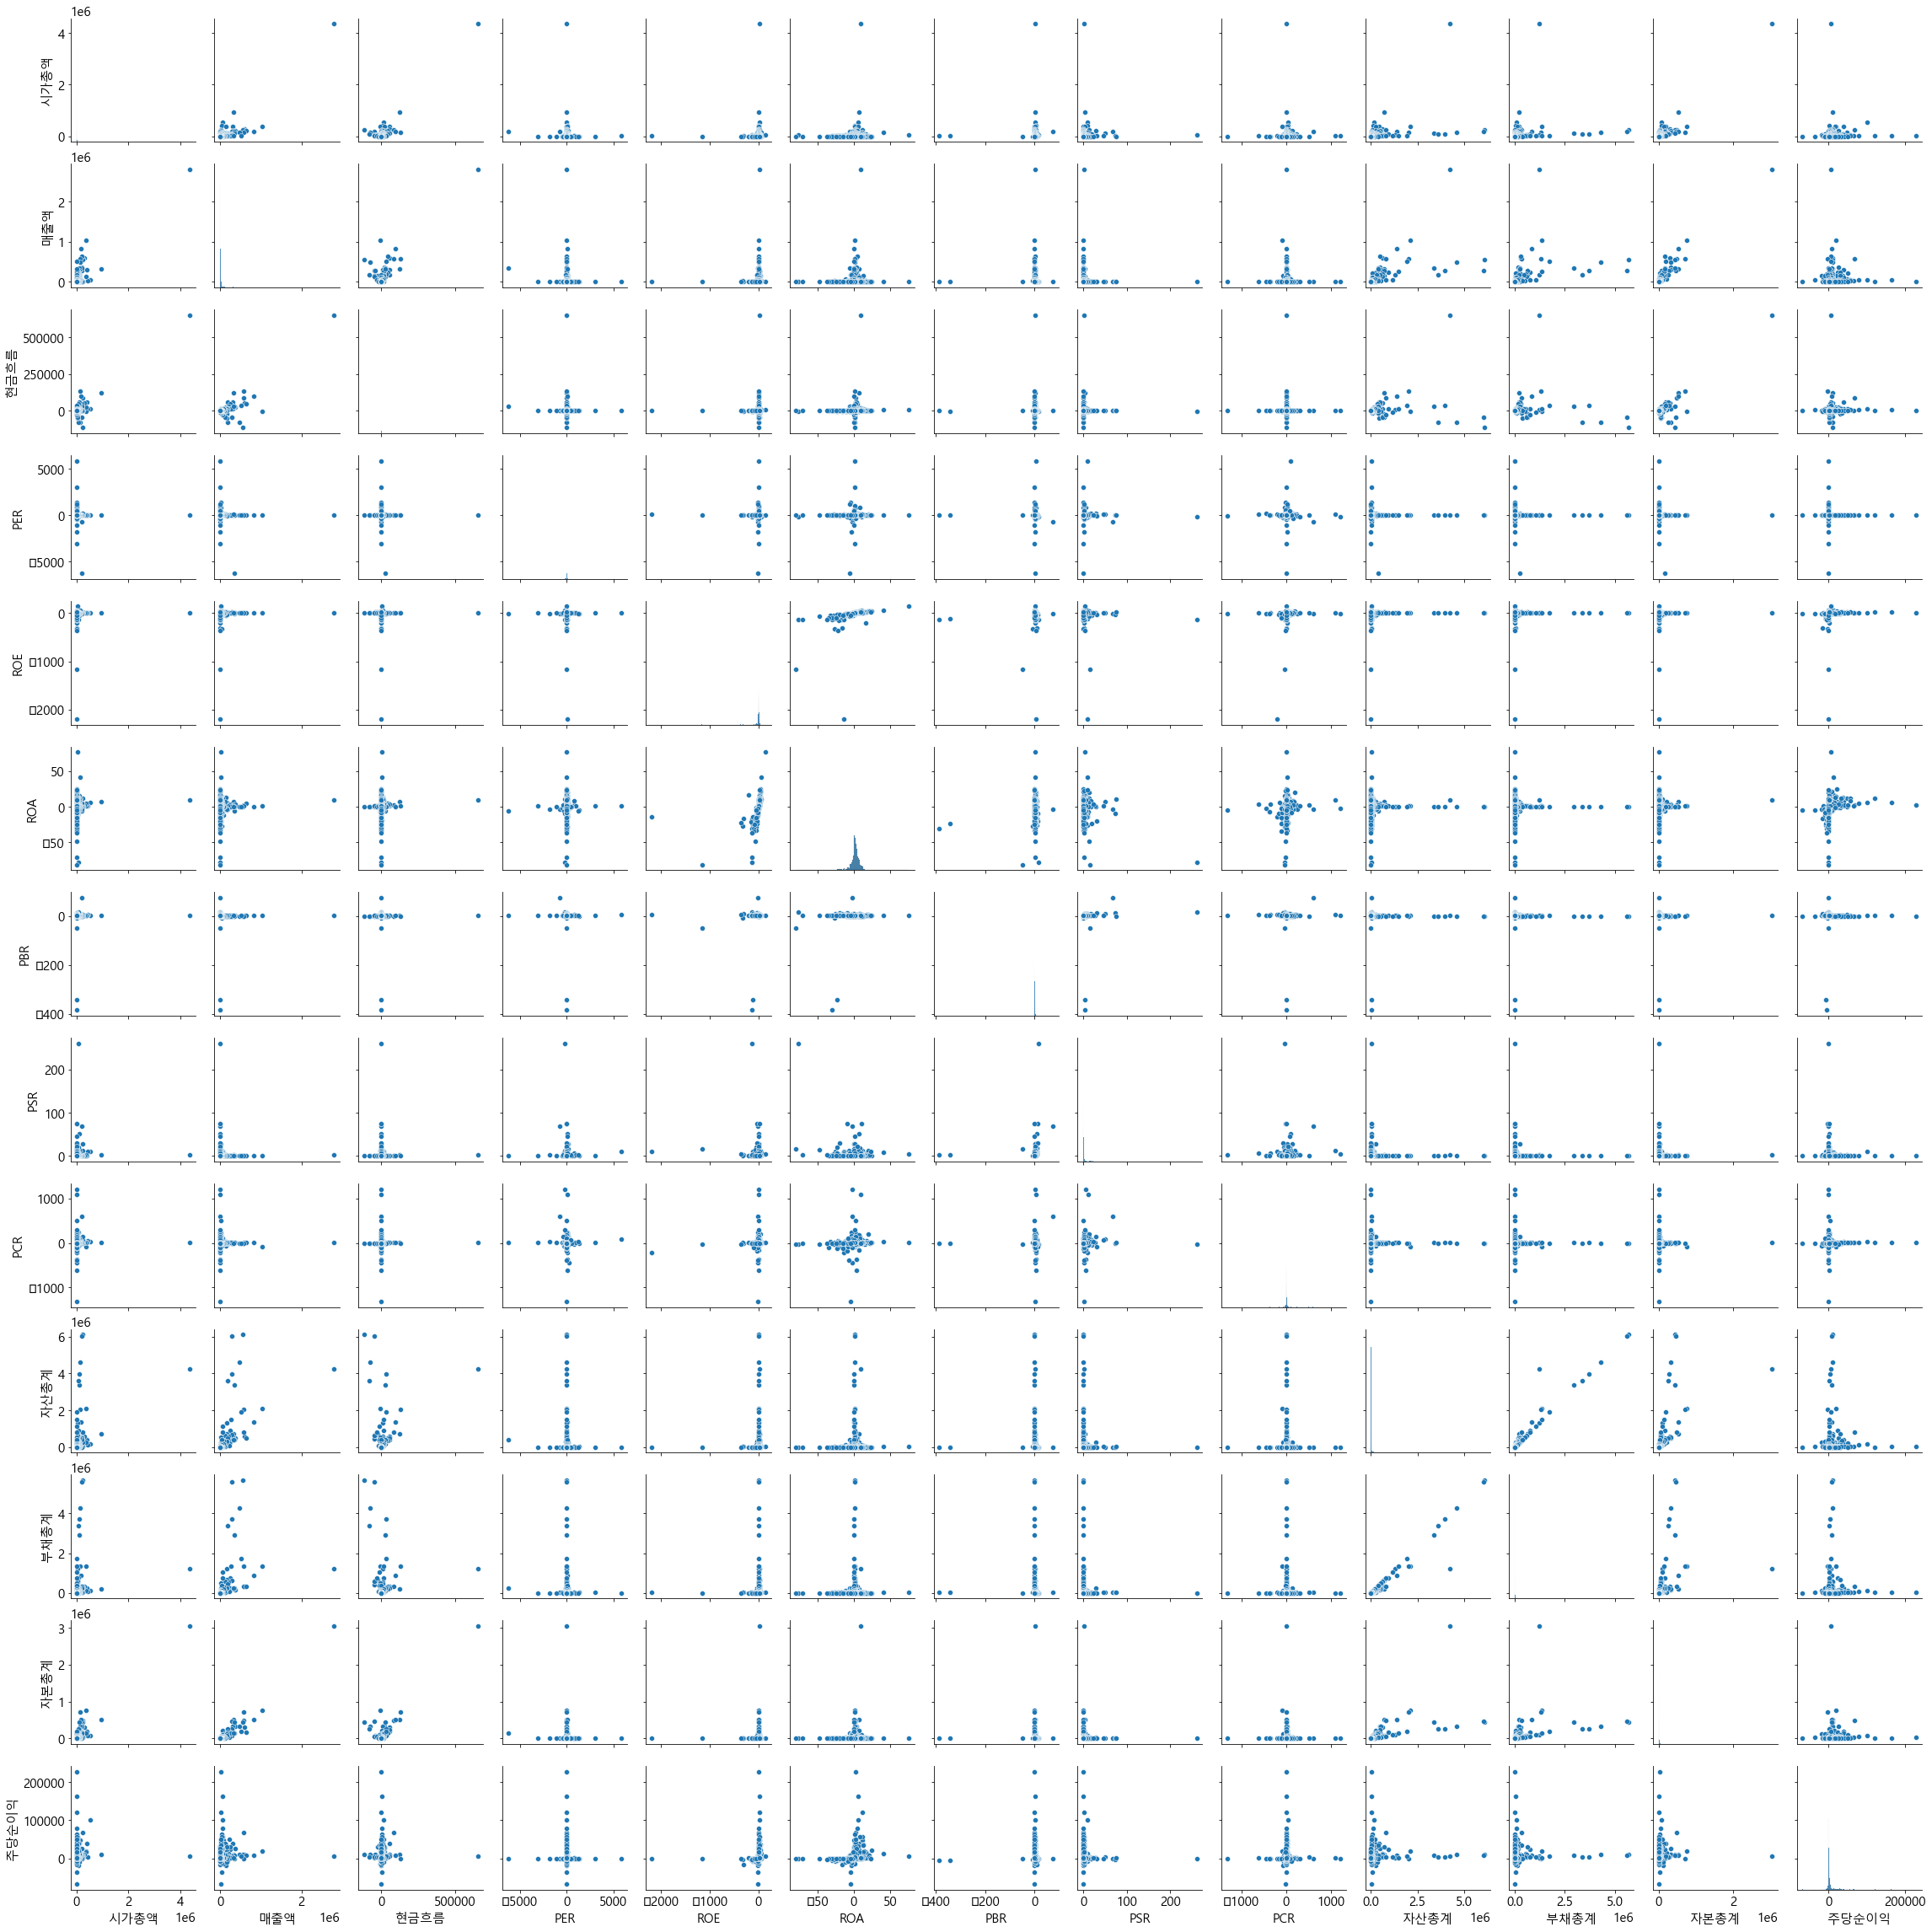

In [14]:
# 전체 변수 간의 관계 Scatter Matrix 생성 : 한글 깨짐 방지 이후
sns.pairplot(df)
plt.rcParams['font.family'] = 'DejaVu Serif Display'
plt.rcParams['font.size'] = 15

### 6. EDA(탐색적 데이터 분석)을 하기 위한 도구
    - Pandas-Profiling 패키지

In [15]:
pip install -U pandas-profiling

     -------------------------------------- 261.2/261.2 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 3.1/3.1 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 102.4/102.4 KB 1.2 MB/s eta 0:00:00
     -------------------------------------- 674.7/674.7 KB 2.4 MB/s eta 0:00:00
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
     -------------------------------------- 155.4/155.4 KB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 76.6/76.6 KB 4.4 MB/s eta 0:00:00
     -------------------------------------- 303.1/303.1 KB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 812.6/812.6 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  P

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
import pandas_profiling

In [17]:
# 리포트 생성하기
pr = df.profile_report()    # 프로파일링 결과 리포트를 pr에 저장

# 파일로 저장
pr.to_file('./pr_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 14.26it/s]
